## Final Project Submission

Please fill out:
* Student name: Carlos Marin
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Abhineet
* Blog post URL:


# To Renovate or not to renovate?
Everyday houses go on sale in America. Some Americans choose to renovate before they sell others renovate after they 
purchase. The purpose of this project is to evalute and create multiple regression model to evaluate renovated and non renovated homes, and to see how they affect house pricing.

In [2]:
# First we import packages to be used.
import markdown
import pandas as pd
import numpy as np
from numpy import mean
from numpy import absolute
from numpy import sqrt
import csv
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.model_selection import KFold
import scipy.stats as stats

plt.style.use('seaborn')

In [3]:
#upload data to be used.
df = pd.read_csv('data/kc_house_data.csv')

In [4]:
with open('column_names.md', 'r') as f:
    file_info = f.read()

In [5]:
#This tells us the what each column represents
file_info

'# Column Names and Descriptions for King County Data Set\n* `id` - Unique identifier for a house\n* `date` - Date house was sold\n* `price` - Sale price (prediction target)\n* `bedrooms` - Number of bedrooms\n* `bathrooms` - Number of bathrooms\n* `sqft_living` - Square footage of living space in the home\n* `sqft_lot` - Square footage of the lot\n* `floors` - Number of floors (levels) in house\n* `waterfront` - Whether the house is on a waterfront\n  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts\n* `view` - Quality of view from house\n  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other\n* `condition` - How good the overall condition of the house is. Related to maintenance of house.\n  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glo

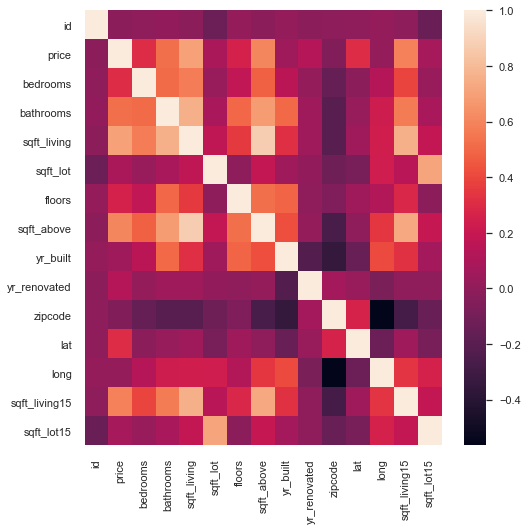

In [6]:
 # Before we can move forward, we need to determine which are the strong variables associated with price.
#seaborn heatmap to see correlation visually

sns.set(rc = {'figure.figsize':(8,8)})
sns.heatmap(df.corr());

In [7]:
# to determine which columns have the strongest correlation to price. We the top two columns that impace price are 
# For the sake of the project.  
# Only sqft_living, bedrooms, sqft_above,and bathrooms will be used
#first model will be price and sqft living
data_corrs = df.corr()['price'].map(abs).sort_values(ascending = False)
data_corrs

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
long             0.022036
id               0.016772
Name: price, dtype: float64

#### bedrooms - Number of bedrooms
#### bathrooms - Number of bathrooms
#### sqft_above - Square footage of house apart from basement
#### sqft_living - Square footage of living space in the home

In [8]:
# we will drop the following columns
df00 = df.drop(columns =['date','lat', 'long', 'sqft_living15', 
                            'sqft_lot15', 'waterfront','view', 'sqft_lot', 'floors', 'condition', 'grade',
                         'sqft_basement', 'yr_built', 'zipcode', 'id'], axis = 1)

In [9]:
#df1 will particularly show only homes renovated
df01 = df00[df00['yr_renovated']> 1900]

In [10]:
df1 = df01.drop(columns = ['yr_renovated'], axis = 1)

In [11]:
df1.dropna(inplace = True)

In [12]:
#prepping to prepare non-renovated dataset
df00['yr_renovated'].fillna(4000, inplace = True)

In [13]:
#df2 will be non-renovated data set
df02 = df00[df00['yr_renovated']> 3000]

In [14]:
df2 = df02.drop(columns = ['yr_renovated'], axis = 1)

In [15]:
df2.dropna(inplace = True)

In [16]:
df1

,price,bedrooms,bathrooms,sqft_living,sqft_above
1,538000.0,3,2.25,2570,2170
35,696000.0,3,2.50,2300,1510
95,905000.0,4,2.50,3300,2390
103,1090000.0,3,2.50,2920,2920
125,1450000.0,4,2.75,2750,1980
...,...,...,...,...,...
19602,451000.0,2,1.00,900,900
20041,434900.0,3,2.00,1520,1520
20428,500012.0,4,2.50,2400,1230
20431,356999.0,3,1.50,1010,1010


In [17]:
df2

,price,bedrooms,bathrooms,sqft_living,sqft_above
2,180000.0,2,1.00,770,770
12,310000.0,3,1.00,1430,1430
23,252700.0,2,1.50,1070,1070
26,937000.0,3,1.75,2450,1750
28,438000.0,3,1.75,1520,790
...,...,...,...,...,...
21576,475000.0,3,2.25,1190,1190
21577,1090000.0,5,3.75,4170,4170
21579,520000.0,2,2.25,1530,1480
21581,1580000.0,4,3.25,3410,3410


In [18]:
x_cols = ['bedrooms', 'bathrooms', 'sqft_living','sqft_above']

In [19]:
#DATA PREPROCESSING - Using normalization on on renovated data set
for col in x_cols:
    df1[col] = (df1[col] - df1[col].mean())/df1[col].std()
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_above
1,538000.0,-0.430078,-0.062473,0.222793,0.342909
35,696000.0,-0.430078,0.215851,-0.025140,-0.434072
95,905000.0,0.505530,0.215851,0.893132,0.601903
103,1090000.0,-0.430078,0.215851,0.544188,1.225842
125,1450000.0,0.505530,0.494175,0.388082,0.119232


In [20]:
#DATA PREPROCESSING - Using Normalization non-renovated data set
for col in x_cols:
    df2[col] = (df2[col] - df2[col].mean())/df2[col].std()
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_above
2,180000.0,-1.506547,-1.411777,-1.403767,-1.206849
12,310000.0,-0.389574,-1.411777,-0.686661,-0.414204
23,252700.0,-1.506547,-0.766633,-1.077810,-0.846556
26,937000.0,-0.389574,-0.444061,0.421594,-0.029892
28,438000.0,-0.389574,-0.444061,-0.588874,-1.182830


# identifying multicolinearity

In [21]:
#it appears bathrooms and sqft living are highly correlated
abs(df1.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_above
price,True,False,False,True,False
bedrooms,False,True,False,False,False
bathrooms,False,False,True,True,False
sqft_living,True,False,True,True,True
sqft_above,False,False,False,True,True


In [22]:
#it appears bathrooms and sqft living are highly correlated
abs(df2.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_above
price,True,False,False,False,False
bedrooms,False,True,False,False,False
bathrooms,False,False,True,True,False
sqft_living,False,False,True,True,True
sqft_above,False,False,False,True,True


### Single linear regression of Price and Sqft Living

In [47]:
f= 'price~sqft_living'
modelA1 = ols(formula=f, data=df).fit()

In [49]:
modelA1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        23:28:35   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multiple linear regression

In [23]:
from statsmodels.formula.api import ols

In [24]:
# OLS analysis for Renovated Data set
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula = formula, data = df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     363.9
Date:                Wed, 18 May 2022   Prob (F-statistic):          5.37e-173
Time:                        23:19:58   Log-Likelihood:                -10582.
No. Observations:                 744   AIC:                         2.117e+04
Df Residuals:                     739   BIC:                         2.120e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.689e+05   1.34e+04     57.475      0.000    7.43e+05    7.95e+05
bedrooms     -1.06e+05   1.68e+04     -6.300      0.000   -1.39e+05    -7.3e+04
bathrooms    1.501e+04   2.19e+04      0.684      0.494   -2.81e+04    5.81e+04
sqft_living   5.59e+05   3.09e+04     18.069      0.000    4.98e+05     6.2e+05
sqft_above  -1.122e+04   2.68e+04     -0.418      0.676   -6.39e+04    4.15e+04
==============================================================================
Omnibus:                      198.824   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1289.530
Skew:                           1.034   Prob(JB):                    9.60e-281
Kurtosis:                       9.109   Cond. No.                         4.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

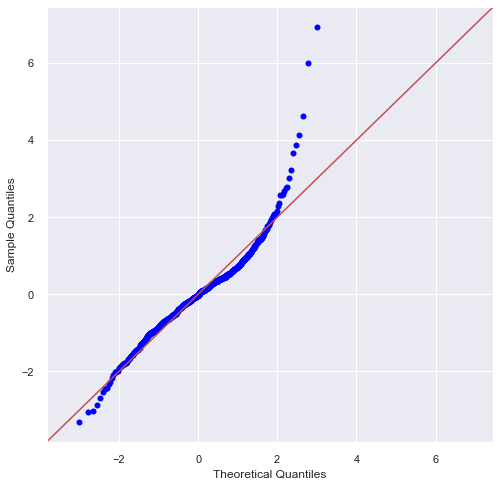

In [28]:
#QQ plot to check for normality of Renovated data set
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

# Pre-trimming of Renovated data set MLR Formula
### Price = 768,901 + (-105,896)(BR) + 14,605(BA)  + 549,565(SQL)+(-112,215)(SQA)

### Price = 768,901 + (-105,896)(X1) + 14,605(X2)  + 549,565(X3)+(-112,215)(X4)

# BUT !

Its important to know in the renovated data set formula, here the P-value for bathroom and sqft_above exceeds P > 0.05 ( P value for bathrooms is 0.505) . Which means it does not hold statistical significance in terms of calculating price. To fix we, will trim the data set to remove outliers and see iots effect on bathrooms in terms of P Value. 

In [26]:
#OLS Anaalysis for NON - renovated data set
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model2 = ols(formula = formula, data = df2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     949.3
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        23:20:01   Log-Likelihood:                -53266.
No. Observations:                3842   AIC:                         1.065e+05
Df Residuals:                    3837   BIC:                         1.066e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.386e+05   4100.716    131.347      0.000    5.31e+05    5.47e+05
bedrooms    -5.484e+04   5169.295    -10.609      0.000    -6.5e+04   -4.47e+04
bathrooms    6942.7558   6433.277      1.079      0.281   -5670.214    1.96e+04
sqft_living  3.041e+05   1.01e+04     29.987      0.000    2.84e+05    3.24e+05
sqft_above  -3.196e+04   8684.275     -3.680      0.000    -4.9e+04   -1.49e+04
==============================================================================
Omnibus:                     2043.809   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29458.326
Skew:                           2.202   Prob(JB):                         0.00
Kurtosis:                      15.831   Cond. No.                         5.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

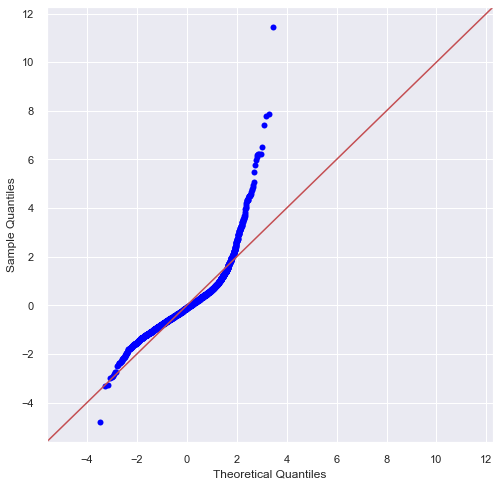

In [30]:
#QQ Plot to check for normality of the non-renovated data
fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

# Pre-Trimming of Non-Renovated Homes Data set Formula
### Price = 538,617 + -53,475(BR) + 5,390(BA) + 276,346(SQL)+ (-31,960)(SQA)

### Price = 538,617 + -53,475(X1) + 5,390(X2) + 276,346(X3)+ (-31,960)(X4)


# But!
Its important to note, here the P-value of Bathroom is greater than P>0.5, which means it does not hold statistical significance in terms of calculating price. In order to fix, we will trim the data to remove outliers and see if that decreases the p-value to make it statistically significant for price calculations

In [31]:
print(model2.params)

Intercept      538617.004945
bedrooms       -54841.687402
bathrooms        6942.755839
sqft_living    304110.076560
sqft_above     -31959.230390
dtype: float64


In both models, we see that they both have a low R-squared under 70%. R squared is used to determine the strength of the linear model and dependent variables. Because both have a low R squared, 

# TRIMMING DATA USING IQR



old df1 shape (744, 5)


/Users/carlosmarin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Renovated dataset Boxplot')

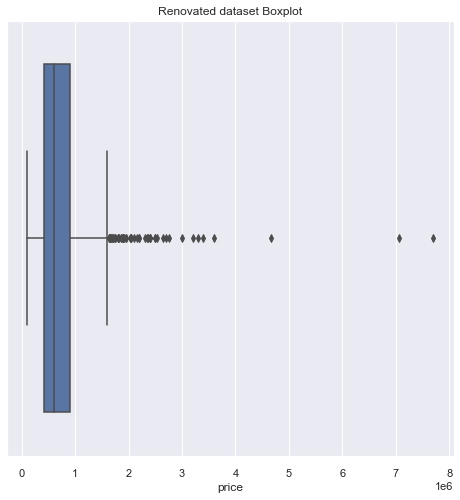

In [32]:
print("old df1 shape", df1.shape)
sns.boxplot(df1['price'])
plt.title('Renovated dataset Boxplot')

In [33]:
Q1DF1 = df1.quantile(0.25)
Q3DF1 = df1.quantile(0.75)
IQR = Q3DF1 - Q1DF1

In [34]:
DF1N=df1[~((df1<(Q1DF1-1.5*IQR)) | (df1>(Q3DF1+1.5*IQR)))]


In [35]:
DF1N.dropna(inplace = True)

In [36]:
DF1N.shape

(644, 5)

/Users/carlosmarin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Post-trimming of Renovated Data set')

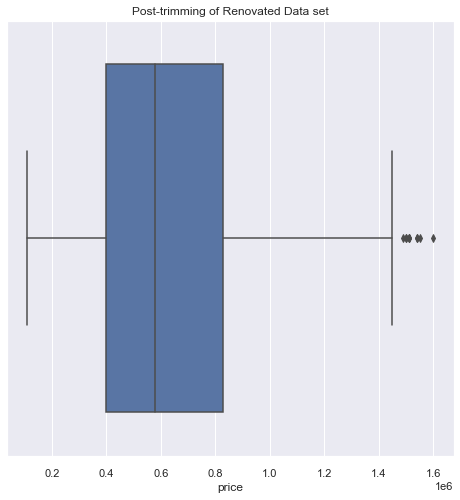

In [37]:
sns.boxplot(DF1N['price'])
plt.title('Post-trimming of Renovated Data set')

In [38]:
#check for QQ plot for normality of residuals after trimming
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living','sqft_above']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model001 = ols(formula = formula, data = DF1N).fit()
model001.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     139.5
Date:                Wed, 18 May 2022   Prob (F-statistic):           1.19e-85
Time:                        23:22:47   Log-Likelihood:                -8864.4
No. Observations:                 644   AIC:                         1.774e+04
Df Residuals:                     639   BIC:                         1.776e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.904e+05   9431.984     73.199      0.000    6.72e+05    7.09e+05
bedrooms    -5.648e+04   1.48e+04     -3.827      0.000   -8.55e+04   -2.75e+04
bathrooms     9.92e+04   1.66e+04      5.990      0.000    6.67e+04    1.32e+05
sqft_living  2.813e+05   2.53e+04     11.110      0.000    2.32e+05    3.31e+05
sqft_above  -4.779e+04   2.01e+04     -2.374      0.018   -8.73e+04   -8253.015
==============================================================================
Omnibus:                       25.837   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.909
Skew:                           0.452   Prob(JB):                     5.28e-07
Kurtosis:                       3.511   Cond. No.                         4.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

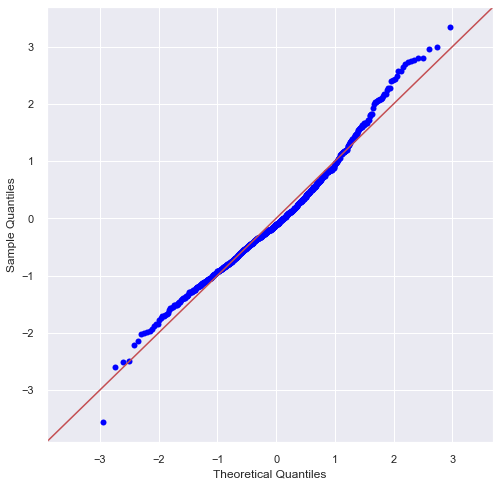

In [39]:
#QQplot to check for normality of post-trimmed renovated data set
fig = sm.graphics.qqplot(model001.resid, dist=stats.norm, line='45', fit=True)

### Post IQR trimming model formula 
#### price = 690,400+ -56,480(BR) + 99,200(BA)+ 281,300(SQL)+ -47,790(SQA)
#### price = 690,400 + -56,4800(X1) +  99,200(X2)+ 281,300(X3)+ -47,790(X4) 

old renovated df shape (3842, 5)


/Users/carlosmarin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'boxplot for non-renovated data set')

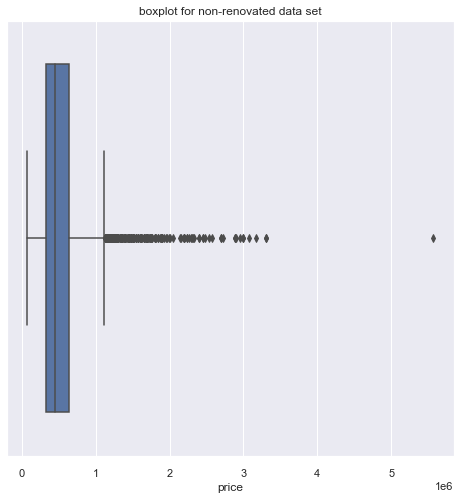

In [40]:
print("old renovated df shape", df2.shape)
sns.boxplot(df2['price'])
plt.title('boxplot for non-renovated data set')

In [41]:
#REMOVING OUTLIERS USING IQR -  for non-renovated data set
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1

In [42]:
DF2N = df2[~((df2<(Q1-1.5*IQR)) | (df2>(Q3+1.5*IQR)))]


In [43]:
DF2N.dropna(inplace = True)

new non-renovated data shape (3468, 5)


/Users/carlosmarin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Post-trimming of Non-Renovated Dataset')

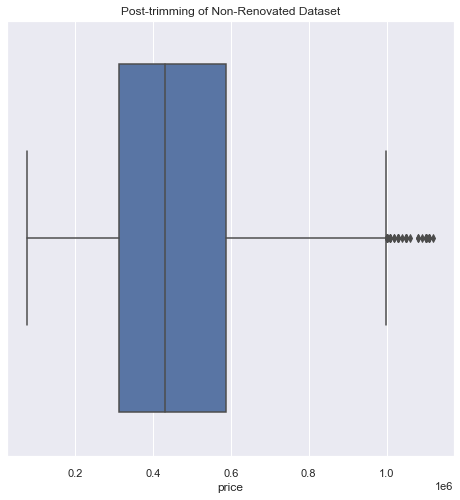

In [44]:
print("new non-renovated data shape", DF2N.shape)
sns.boxplot(DF2N['price'])
plt.title('Post-trimming of Non-Renovated Dataset')

In [45]:
#OLS analysis for non-renovated dataset
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_above']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model002 = ols(formula = formula, data = DF2N).fit()
model002.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     480.3
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        23:23:26   Log-Likelihood:                -46474.
No. Observations:                3468   AIC:                         9.296e+04
Df Residuals:                    3463   BIC:                         9.299e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    4.929e+05   2787.322    176.821      0.000    4.87e+05    4.98e+05
bedrooms    -2.934e+04   3885.986     -7.550      0.000    -3.7e+04   -2.17e+04
bathrooms    1.103e+04   4415.986      2.497      0.013    2367.159    1.97e+04
sqft_living  1.814e+05   7663.100     23.673      0.000    1.66e+05    1.96e+05
sqft_above  -1.627e+04   6267.366     -2.596      0.009   -2.86e+04   -3984.291
==============================================================================
Omnibus:                      237.118   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.498
Skew:                           0.659   Prob(JB):                     8.30e-64
Kurtosis:                       3.524   Cond. No.                         4.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

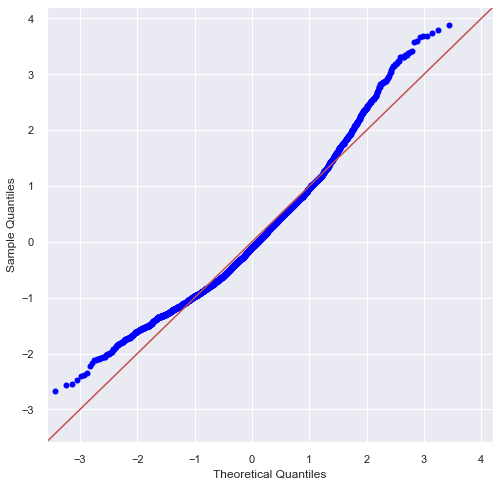

In [46]:
#QQplot to check for normality of post-trimming non-renovated data set
fig = sm.graphics.qqplot(model002.resid, dist=stats.norm, line='45', fit=True)

### Post IQR trimming model formula FOR NONRENOVATED DATA SET 
#### price = 492,900 + -29,340(BR) + 11,030(BA)+ 181,400(SQL)+ - 16,270(SQA)
#### price = 492,900 + -29,340(X1) + 11,030(X2)+ 181,400(X3)+ - 16,270(X4)

### Post IQR trimming model formula RENOVATED
#### price = 690,400+ -56,480(BR) + 99,200(BA)+ 281,300(SQL)+ -47,790(SQA)
#### price = 690,400 + -56,4800(X1) +  99,200(X2)+ 281,300(X3)+ -47,790(X4) 

## Regression Model Validation

This step we create test and train sets from the x colums and y column('price'). This data will be used later for K Cross Model Validation, and scoring accuracy of the model for both data sets

In [166]:
#defining Y and X for renovated data set
y1 = DF1N[['price']]
x1 = DF1N.drop(['price'], axis = 1)

In [167]:
#defining Y and X for non-renovated data set
y2 = DF2N[['price']]
x2 = DF2N.drop(['price'], axis = 1)
linreg = LinearRegression()

In [168]:
x1_train, x1_test, y1_train,y1_test = train_test_split(x1, y1, test_size =0.2)

In [169]:
x2_train, x2_test, y2_train,y2_test = train_test_split(x2, y2, test_size =0.2)

In [170]:
print(len(x1_train), len(x1_test), len(y1_train,), len(y1_test))

515 129 515 129


In [171]:
print(len(x2_train), len(x2_test), len(y2_train,), len(y2_test))

2774 694 2774 694


### Fitting linear regression model
This is an alternative method done to calculate the intercepts, and coefficients not using the OLS.Statsmodels method

In [172]:
linr_model1 = LinearRegression().fit(x1,y1)

In [173]:
linr_model2 = LinearRegression().fit(x2,y2)

In [174]:
print('Coefficients: \n', linr_model1.coef_)

Coefficients: 
 [[-56476.48116216  99198.51356718 281290.20740525 -47785.39596274]]


In [175]:
print('Coefficients: \n', linr_model2.coef_)

Coefficients: 
 [[-29340.97672613  11025.35754923 181404.97584288 -16272.39738043]]


In [176]:
print('Intercepts: \n',linr_model1.intercept_)

Intercepts: 
 [690410.0685187]


In [177]:
print('Intercepts: \n',linr_model2.intercept_)

Intercepts: 
 [492858.09440973]


# K FOLD CROSS VALIDATION FOR THE RENOVATED AND NONRENOVATED DATA SETS


To evaluate the performance of the model, we need to measure how well predictions made by the model match the
observed data. This is done using K-Fold Cross-Validation.


In [178]:
#Here we define the cross-validation method to use
cv = KFold(n_splits = 10, random_state = 1, shuffle = True)

In [179]:
#From here we use tyhe K-Fold to evaluate the model, this is for the renovated data set
scores1 = cross_val_score(linreg, x1, y1, scoring = 'neg_mean_squared_error', cv=cv, n_jobs = -1)

In [180]:
sqrt(mean(absolute(scores1)))

231960.09211716463

In [181]:
#From here we use tyhe K-Fold to evaluate the model, this is for the non-renovated data set
scores2 = cross_val_score(linreg, x2, y2, scoring = 'neg_mean_squared_error', cv=cv, n_jobs = -1)

In [182]:
sqrt(mean(absolute(scores2)))

160092.17910411788

### MAE ( MEAN ABSOLUTE ERROR)
### The MAE for the renovated data set is 231,960
### The MAE for the non-renovated data set is 160,092
### Ideally, The lower the MAE score is, the more closeley  a model is able to predict actual observations.
### The model for non-renovated seems to be more accurate in comparison to renovated.

### Another Method to analze model performance is called ROOT MEAN SQUARED ERROR (RMSE), this is done using LOOCV (LEAVE ONE OUT CROSS VALIDATION)

In [117]:
#again define the define the cross-validation method to use.
cv = KFold(n_splits=10, random_state=1, shuffle=True) 

In [118]:
#using LOOCV (LEAVE ONE OUT CROSS VALIDATION) to evaluate model
scores01 = cross_val_score(linreg, x1, y1, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

In [119]:
#using LOOCV (LEAVE ONE OUT CROSS VALIDATION) to evaluate model
scores02 = cross_val_score(linreg, x2, y2, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

In [120]:
#view RMSE for renovated data sets
sqrt(mean(absolute(scores01)))

217397.3982380013

In [121]:
#view RMSE for non-renovated data sets
sqrt(mean(absolute(scores02)))

160096.33162956007

# The RMSE (ROOT MEAN SQUARED ERROR)
### The RMSE for the renovated data set is 217,397
### The RMSE for the non-renovated data set is 160,096
### Ideally just like the MAE, the lower the number the more closely a model is able to predict actual observations.
### The model for non-renovated seems to be more accurate in comparison to renovated.

# Modeling the data

In [183]:
lm = linear_model.LinearRegression()

In [184]:
#This is used to score the model accuracy.
model01 = lm.fit(x1_train, y1_train)
model02 = lm.fit(x2_train, y2_train)

In [185]:
#WE create the prediction which is plotted against in the renovated data set, against the y1 test set. 
prediction1 = lm.predict(x1_test)

In [186]:
#WE create the prediction which is plotted against in the non-renovated data set, against the y1 test set.
prediction2 = lm.predict(x2_test)

Text(0.5, 1.0, 'Actual vs Predicted for Renovated Housing')

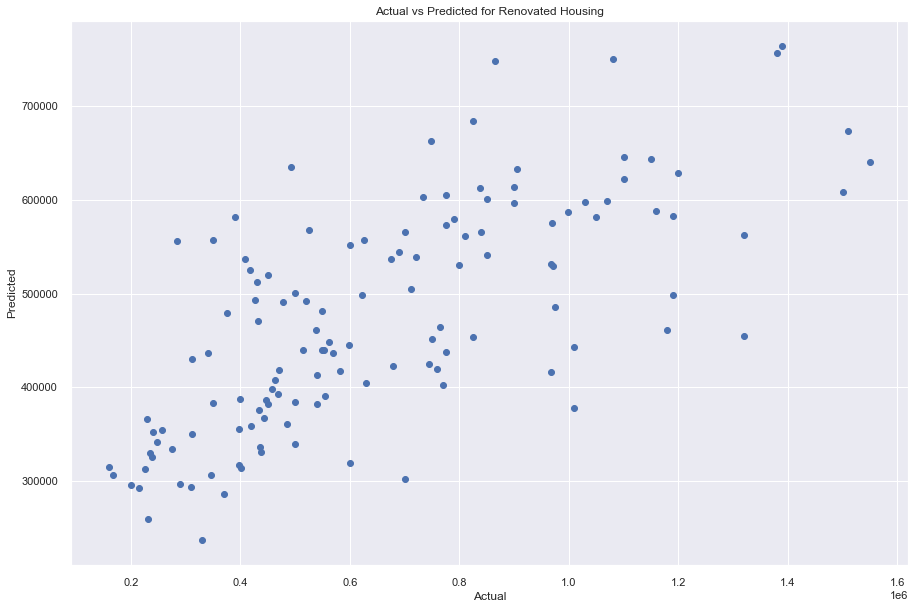

In [187]:
# using the Prediction data we use, we plot it against to see how accurate our model. 
# We see here in the renovated data set, there is alot of variability in the linear regression. 
# This will score very low, when we calulcate the model accuracy
plt.figure(figsize = (15,10))
plt.scatter(y1_test, prediction1)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for Renovated Housing')

In [188]:
model01.score(x1_test, y1_test)

0.05929645927660132

In [189]:
model02.score(x2_test, y2_test)

0.3229057392946457

Text(0.5, 1.0, 'Actual vs Predicted for non renovated housing')

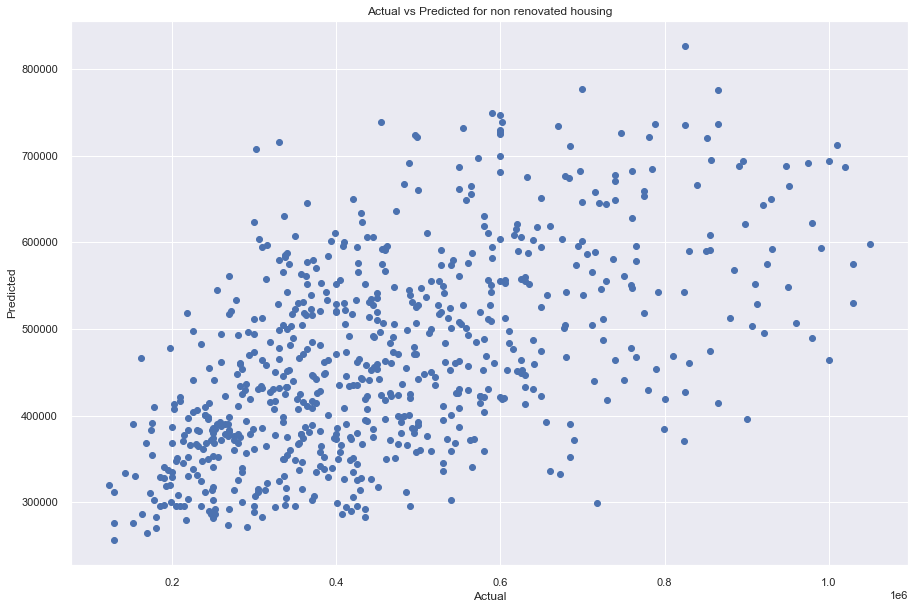

In [190]:
plt.figure(figsize = (15,10))
plt.scatter(y2_test, prediction2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for non renovated housing')

# remove bold text in observations

### The model accuracy score for the renovated data set is 0.059
### The model accuracy score for the non-renovated is 0.323
### An Ideal model accuracy score is closer to 1.00, the more accurate the model is at calculating predicted vs actual values.
### Based on the two figures, of actual vs predictions for renovated and non-renovated, there is a lot of variability which makes it harder to accurately predict values. but based on scoring, the accuracy score is greater for the non-renovated data set

### Well How does the original (untrimmed) data do in modeling and scoring?

In [202]:
#defining Y and X for renovated data set
y11 = df1[['price']]
x11 = df1.drop(['price'], axis = 1)

In [203]:
#defining Y and X for non-renovated data set
y22 = df2[['price']]
x22 = df2.drop(['price'], axis = 1)
linreg = LinearRegression()

In [204]:
x11_train, x11_test, y11_train,y11_test = train_test_split(x11, y11, test_size =0.2)

In [205]:
x22_train, x22_test, y22_train,y22_test = train_test_split(x22, y22, test_size =0.2)

In [206]:
#WE create the prediction which is plotted against in the renovated data set, against the y11 test set. 
prediction11 = lm.predict(x11_test)

In [207]:
#WE create the prediction which is plotted against in the nonrenovated data set, against the y22 test set. 
prediction22 = lm.predict(x22_test)

Text(0.5, 1.0, 'Actual vs Predicted for Renovated Housing(untrimmed)')

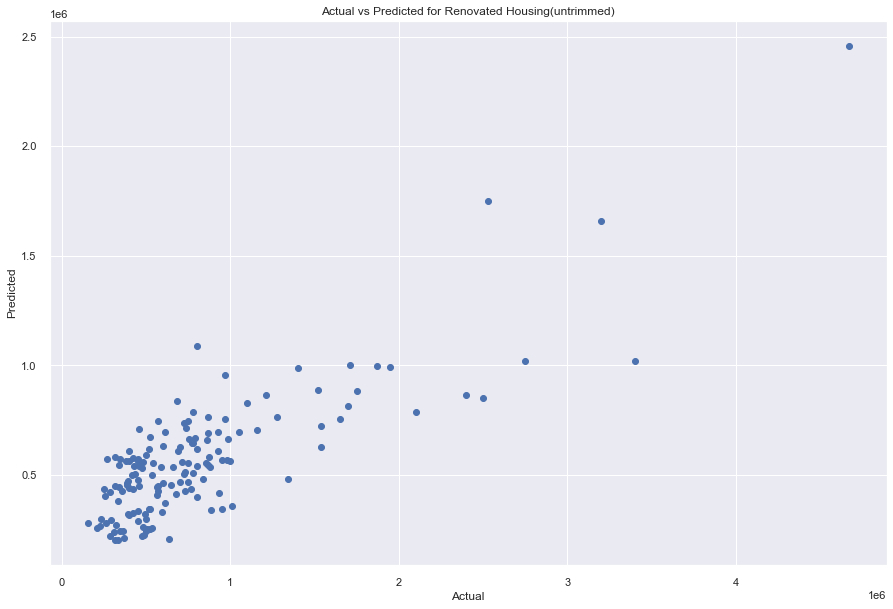

In [208]:
# using the Prediction data we use, we plot it against to see how accurate our model. 
# We see here in the renovated data set, there is alot of variability in the linear regression. 
# This will score very low, when we calulcate the model accuracy
plt.figure(figsize = (15,10))
plt.scatter(y11_test, prediction11)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for Renovated Housing(untrimmed)')

Text(0.5, 1.0, 'Actual vs Predicted for non renovated housing(untrimmed)')

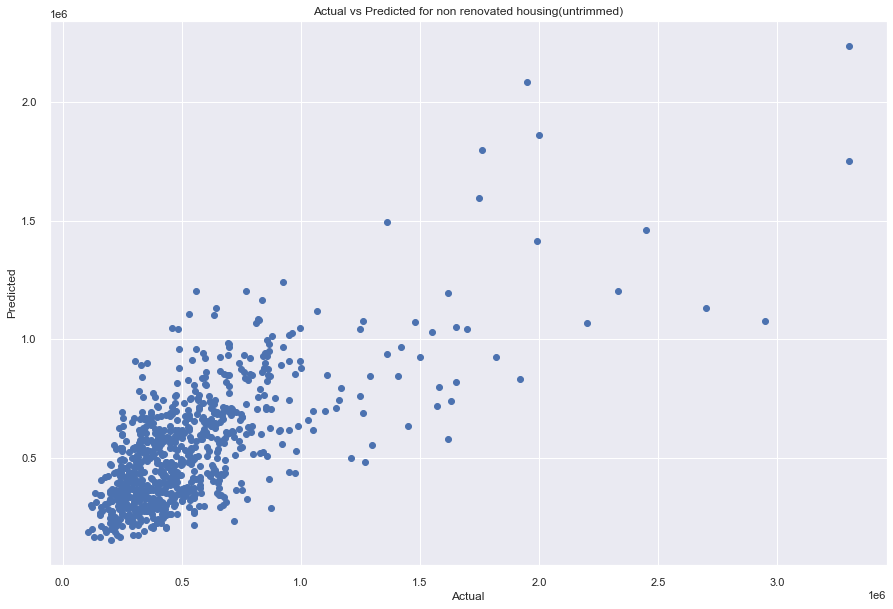

In [209]:
plt.figure(figsize = (15,10))
plt.scatter(y22_test, prediction22)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for non renovated housing(untrimmed)')

In [210]:
#This is used to score the model accuracy.
model011 = lm.fit(x11_train, y11_train)
model022 = lm.fit(x22_train, y22_train)

In [211]:
model011.score(x11_test, y11_test)

0.3928871064707721

In [212]:
model022.score(x22_test, y22_test)

0.5001264032635243

### Renovated (untrimmed) model scoring is 0.393
### Non-Renovated(untrimmed) model scoring is 0.500

## In Conclusion
First I evaluated how each coefficient (bedroom, bathroom, square foot living area, square foot above area) when renovated how they affect pricing of a home. Shortly after modeling, I noticed there was a discrepancy in p-value. I also looked at how I can optimize the model by removing the outliers. In removing the outliers I optimized the model and removed the P-value discrepancy.


## Next steps... 
#### 1) Evaluate renovated homes by decade renovated
#### 2) Evaluate homes based on what year they were built (by decade built), and comparing whether renovation is necessary.
#### 3) Evaluate what other areas of home can greatly impact price for renovated and non-renovated homes.